In [30]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model
import statsmodels.api as sm

In [31]:
df = pd.read_csv("very_clean_data.csv")
df = df.drop(columns=['Unnamed: 0'])
print(df)

     Manufacturer                           Model Name            Category  \
0           Apple                          MacBook Pro           Ultrabook   
1           Apple                          Macbook Air           Ultrabook   
2              HP                               250 G6            Notebook   
3           Apple                          MacBook Pro           Ultrabook   
4           Apple                          MacBook Pro           Ultrabook   
...           ...                                  ...                 ...   
1297       Lenovo                       Yoga 500-14ISK  2 in 1 Convertible   
1298       Lenovo                       Yoga 900-13ISK  2 in 1 Convertible   
1299       Lenovo                   IdeaPad 100S-14IBR            Notebook   
1300           HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook   
1301         Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook   

      Screen Size                           GPU Operating Syste

In [32]:
x = df[['RAM', 'fullRes', 'Clockspeed']]
y = df['Price (Euros)']
print("--------------Independent Variables used for multidimensional linear regression--------------")
print(x)
print("----------------Dependent Variable used for multidimensional linear regression---------------")
print(y)

--------------Independent Variables used for multidimensional linear regression--------------
      RAM  fullRes  Clockspeed
0       8  4096000         2.3
1       8  1296000         1.8
2       8  2073600         2.5
3      16  5184000         2.7
4       8  4096000         3.1
...   ...      ...         ...
1297    4  2073600         2.5
1298   16  5760000         2.5
1299    2  1049088         1.6
1300    6  1049088         2.5
1301    4  1049088         1.6

[1302 rows x 3 columns]
----------------Dependent Variable used for multidimensional linear regression---------------
0       1339
1        898
2        575
3       2537
4       1803
        ... 
1297     638
1298    1499
1299     229
1300     764
1301     369
Name: Price (Euros), Length: 1302, dtype: int64


In [33]:
regr = linear_model.LinearRegression()
regr.fit(x, y)
print("Intercept: ", regr.intercept_)
print("Coefficients: ", regr.coef_)

Intercept:  -407.3864965595617
Coefficients:  [7.83307256e+01 1.33170348e-04 2.54811516e+02]


In [34]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Price (Euros)   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     767.5
Date:                Fri, 06 Nov 2020   Prob (F-statistic):          6.39e-287
Time:                        12:47:34   Log-Likelihood:                -9710.8
No. Observations:                1302   AIC:                         1.943e+04
Df Residuals:                    1298   BIC:                         1.945e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -407.3865     55.486     -7.342      0.0

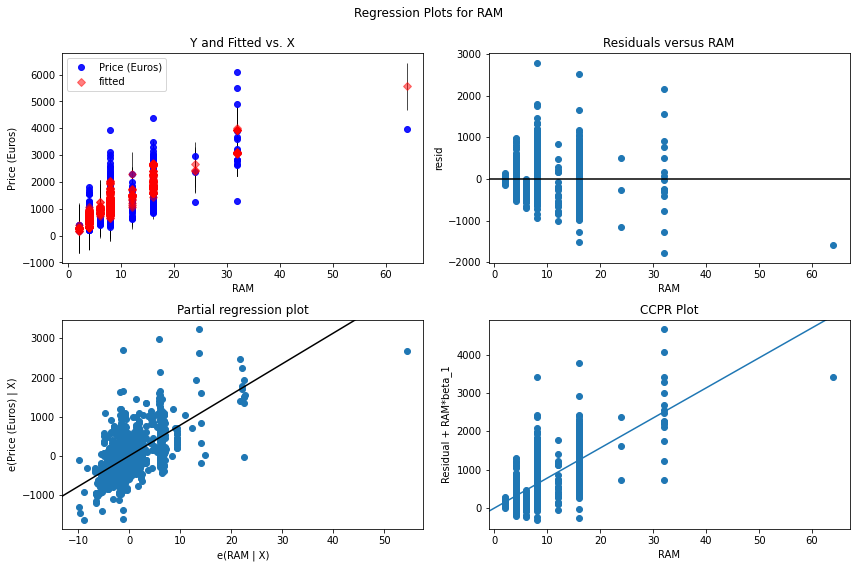

In [35]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'RAM', fig=fig)
plt.show()

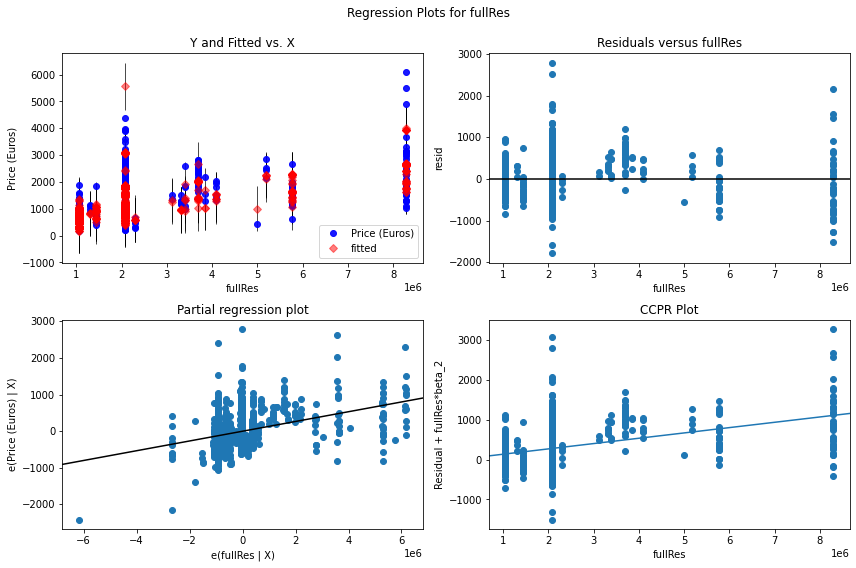

In [36]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'fullRes', fig=fig)
plt.show()

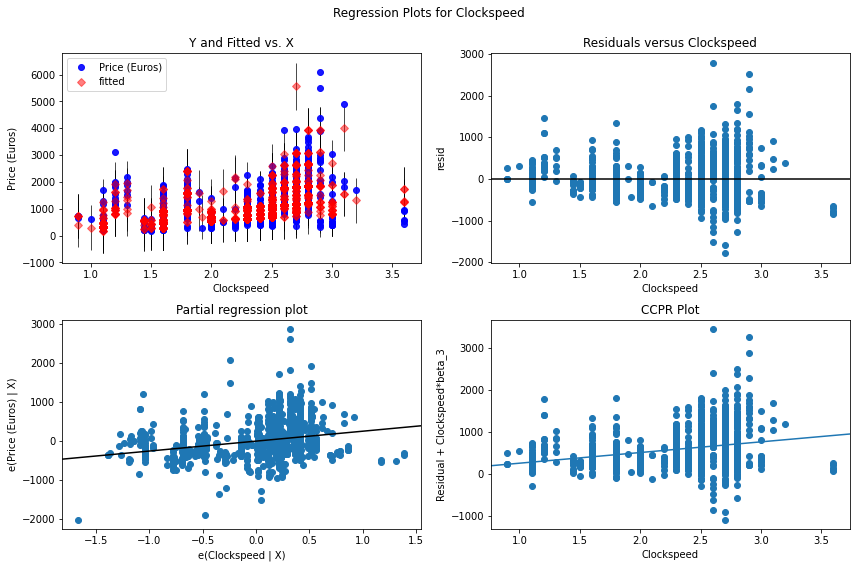

In [37]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Clockspeed', fig=fig)
plt.show()

In [38]:
predictRam = 8
predictres = 1920*1080
predictclock = 3.5
regr.predict([[predictRam, predictres, predictclock]])

array([1387.24164706])